# The Effects of a Changing Environment on the Spectra of Mars Analog Samples

This work constitutes the data analysis section for my MSc thesis at UCL (currently in progress, due August 2024). My project is advised by Dr Louisa Preston, with support from Professor Lewis Dartnell and Connor Ballard.

In this notebook, I will be analysing how lyophilization affects the spectra of Mars analog samples. This analysis includes:

* Mid-IR spectra collected at the Mullard Space Science Laboratory using the Agilent 4300 Handheld FTIR spectrometer, docked onto a table-top setup and equipped with a Diamond-ATR sampling module.
* Vis-NIR spectra collected at the University of Westminster using the RxSpec 700Z spectrometer. There are spectral joins in this data at $1000cm^{-1}$ and $1850cm^{-1}$, so features around these wavenumbers should be disregarded in analysis. 

In [821]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir

## Samples

I am analysing sandstone from Antarctica (denoting Antarctica crytoendolith sandstone as ACE SST) and <a href="https://doi.org/10.1016/j.icarus.2023.115568">SOPHIA</a> (Simulant for Oxia Planum: Hydrated, Igneous, and Amorphous). I also analyse the spectra for a microbial mat collected on the Robert Falcon Scott expedition to Antarctica in 1910. For the SOPHIA sample, I analyse the spectra with and without microbes from the mat mixed in. For each sample, I collected multiple spectra to analyse different parts of the sample. These are labeled as subsamples (SS). I label the samples as: 

* ACE SST BP5 - crustal layer of Antarctica sandstone sample from site BP5
* ACE SST BP6 - crustal layer of Antarctica sandstone sample from site BP6
* ACE SST BLACK - black layer of Antarctica sandstone sample
* SCOTT MAT - microbial mat from the Scott expedition
* SOPHIA - simulant
* SOPHIA MAT - simulant with microbial mat mixed in

In [822]:
DATA_ROOT = './Data'
DATA_BEFORE = DATA_ROOT + '/BEFORE LYO'
DATA_AFTER = DATA_ROOT + '/AFTER LYO'
DATA_MIR = '/MID IR'
DATA_VIS_NIR = '/VIS NIR'
DATA_ACE_SST_BP5 = '/ACE SST BP5'
DATA_ACE_SST_BP6 = '/ACE SST BP6'
DATA_ACE_SST_BLACK = '/ACE SST BLACK'
DATA_SCOTT_MAT = '/SCOTT MAT'
DATA_SOPHIA = '/SOPHIA'
DATA_SOPHIA_MAT = '/SOPHIA MAT'

DATA_MIR_BEFORE = DATA_BEFORE + DATA_MIR
DATA_MIR_AFTER = DATA_AFTER + DATA_MIR
DATA_VIS_NIR_BEFORE = DATA_BEFORE + DATA_VIS_NIR
DATA_VIS_NIR_AFTER = DATA_AFTER + DATA_VIS_NIR

DATA_SKIP_ROWS_MIR_BEFORE=28
DATA_SKIP_ROWS_MIR_AFTER=1
DATA_SKIP_FOOTER_MIR_AFTER=215

STYLE_BEFORE = '-'
STYLE_AFTER = '--'
SAMPLE_COLOURS = {
    'ACE SST BP5': 'b',
    'ACE SST BP6': 'c',
    'ACE SST BLACK': 'k',
    'SCOTT MAT': 'g',
    'SOPHIA': 'r',
    'SOPHIA MAT': 'm',
}

In [823]:
def load_spectra(fileName):
    delimiter = '\t'
    if (fileName.endswith('.csv')):
        delimiter = ','

    skiprows = 0
    skipfooter = 0
    if (DATA_MIR_BEFORE in fileName):
        skiprows = DATA_SKIP_ROWS_MIR_BEFORE
    elif (DATA_MIR_AFTER in fileName):
        skiprows = DATA_SKIP_ROWS_MIR_AFTER
        skipfooter = DATA_SKIP_FOOTER_MIR_AFTER

    result = np.loadtxt(fileName, delimiter=delimiter, skiprows=skiprows)
    result = np.transpose(result)

    if (skipfooter != 0):
        result = [result[0][0:-skipfooter], result[1][0:-skipfooter]]

    return result

In [824]:
def load_selected_spectra(dir, ss):
    subsample = listdir(dir)[ss - 1]

    return load_spectra(fileName=dir + '/' + subsample)

In [825]:
def load_subsamples_spectra(dir):
    result = {}

    for sample in listdir(dir):
        result[sample] = []
        
        for subsample in listdir(dir + '/' + sample):
            result[sample].append(load_spectra(fileName=dir + '/' + sample + '/' + subsample))

    return result

In [826]:
BEFORE_MIR = load_subsamples_spectra(dir=DATA_MIR_BEFORE)
AFTER_MIR = load_subsamples_spectra(dir=DATA_MIR_AFTER)
BEFORE_VIS_NIR = load_subsamples_spectra(dir=DATA_VIS_NIR_BEFORE)
AFTER_VIS_NIR = load_subsamples_spectra(dir=DATA_VIS_NIR_AFTER)

SELECTED_SUBSAMPLES = {
    'BEFORE_MIR': {
        'ACE_SST_BP5': None,
        'ACE_SST_BP6': None,
        'ACE_SST_BLACK': None,
        'SCOTT_MAT': None,
        'SOPHIA': None,
        'SOPHIA_MAT': None,
    },
    'AFTER_MIR': {
        'ACE_SST_BP5': None,
        'ACE_SST_BP6': None,
        'ACE_SST_BLACK': None,
        'SCOTT_MAT': None,
        'SOPHIA': None,
        'SOPHIA_MAT': None,
    },
    'BEFORE_VIS_NIR': {
        'ACE_SST_BP5': None,
        'ACE_SST_BP6': None,
        'ACE_SST_BLACK': None,
        'SCOTT_MAT': None,
        'SOPHIA': None,
        'SOPHIA_MAT': None,
    },
    'AFTER_VIS_NIR': {
        'ACE_SST_BP5': None,
        'ACE_SST_BP6': None,
        'ACE_SST_BLACK': None,
        'SCOTT_MAT': None,
        'SOPHIA': None,
        'SOPHIA_MAT': None,
    },
}

## Plotting Functions

In [827]:
def get_fmt(sample, isBefore, showAll):
    colour = SAMPLE_COLOURS[sample]
    style = STYLE_AFTER
    
    if (isBefore):
        style = STYLE_BEFORE
        
    if (showAll):
        return style  

    return style + colour

In [828]:
def get_subsamples(sample, isMIR, isBefore):
    if (isMIR):
        if (isBefore):
            return BEFORE_MIR[sample]
        
        return AFTER_MIR[sample]
    
    if (isBefore):
        return BEFORE_VIS_NIR[sample]
        
    return AFTER_VIS_NIR[sample]  

In [829]:
def get_selected_subsample(sample, isMIR, isBefore):
    if (isMIR):
        if (isBefore):
            return SELECTED_SUBSAMPLES['BEFORE_MIR'][sample]
        
        return SELECTED_SUBSAMPLES['AFTER_MIR'][sample]
    
    if (isBefore):
        return SELECTED_SUBSAMPLES['BEFORE_VIS_NIR'][sample]
        
    return SELECTED_SUBSAMPLES['AFTER_VIS_NIR'][sample]


In [830]:
def get_title(sample, isMIR, isBefore):
    result = sample + ': '

    if (isMIR):
        result += 'MIR '
    else:
        result += 'Vis-NIR '

    if (isBefore):
        result += 'Before '
    else:
        result += 'After '

    result += 'Lyophilization'

    return result

In [831]:
def create_figure(title, isMIR):
    xlabel = 'Wavelength ($nm$)'
    ylabel = 'Reflectance'
    if (isMIR):
        xlabel = 'Wavenumber ($cm^{-1}$)'
        ylabel = 'Absorbance'
    
    fig, ax = plt.subplots()

    ax.set_title(title)
    ax.set(xlabel=xlabel, ylabel=ylabel)

    if (isMIR):
        ax.invert_xaxis()

    return fig, ax

In [832]:
def plot_sample(sample, isMIR, isBefore, showAll=False):
    fmt = get_fmt(sample, isBefore, showAll)
    data = get_subsamples(sample, isMIR, isBefore)
    if (not showAll):
        data = [data[get_selected_subsample(sample, isMIR, isBefore) - 1]]

    title = get_title(sample=sample, isBefore=isBefore, isMIR=isMIR)
    fig, ax = create_figure(title=title, isMIR=isMIR)

    for i in range(len(data)):
        ax.plot(data[i][0], data[i][1], fmt, label='SS ' + str(i + 1))
    
    if (len(data) > 1):
        ax.legend()

    # fig.savefig('./Spectra/' + title + '/' + sample + '.png')

In [833]:
def compare_subsamples(sample_A, isMIR, sample_A_isBefore, sample_B=None, sample_B_isBefore=None, sample_C=None, sample_C_isBefore=None):
    if ((sample_A_isBefore == False and sample_B_isBefore == True) or (sample_A_isBefore == True and sample_B_isBefore == False)):
        raise Exception('Only compare samples both before or both after lyophilization')

    if (sample_B == None):
        sample_B = sample_A
        sample_B_isBefore = not sample_A_isBefore
        title = sample_A + ' Lyophilization Effects'
        labelA = 'Before'
        labelB = 'After'
    else:
        title = sample_A + ' vs. ' + sample_B
        if (sample_C):
            title += ' vs. ' + sample_C

        if (sample_A_isBefore and sample_B_isBefore):
            title += ' Before Lyophilization'
        else:
            title += ' After Lyophilization'
                    
        labelA = sample_A
        labelB = sample_B

    sample_A_selected = get_selected_subsample(sample_A, isMIR, sample_A_isBefore) - 1
    subsample_A = get_subsamples(sample_A, isMIR, sample_A_isBefore)[sample_A_selected]

    sample_B_selected = get_selected_subsample(sample_B, isMIR, sample_B_isBefore) - 1
    subsample_B = get_subsamples(sample_B, isMIR, sample_B_isBefore)[sample_B_selected]
    
    fig, ax = create_figure(title=title, isMIR=isMIR)

    ax.plot(subsample_A[0], subsample_A[1], get_fmt(sample_A, sample_A_isBefore, showAll=False), label=labelA)
    ax.plot(subsample_B[0], subsample_B[1], get_fmt(sample_B, sample_B_isBefore, showAll=False), label=labelB)

    if (sample_C):
        sample_C_selected = get_selected_subsample(sample_C, isMIR, sample_C_isBefore) - 1
        subsample_C = get_subsamples(sample_C, isMIR, sample_C_isBefore)[sample_C_selected]

        ax.plot(subsample_C[0], subsample_C[1], get_fmt(sample_C, sample_C_isBefore, showAll=False), label=sample_C)

    ax.legend()
    
#     fig.savefig('./Spectra/' + title + '/' + sample + '.png')

## MID IR Analysis

### Before Lyophilization 

In [837]:
def plot_mir_before(sample, showAll=False):
    plot_sample(sample=sample, isMIR=True, isBefore=True, showAll=showAll)

#### ACE SST BP5

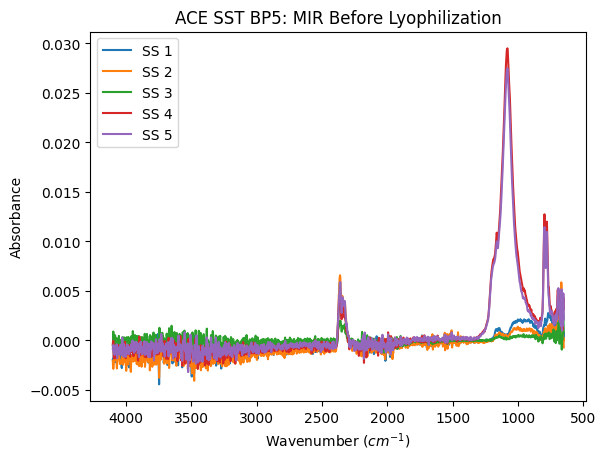

In [838]:
plot_mir_before(sample='ACE SST BP5', showAll=True)

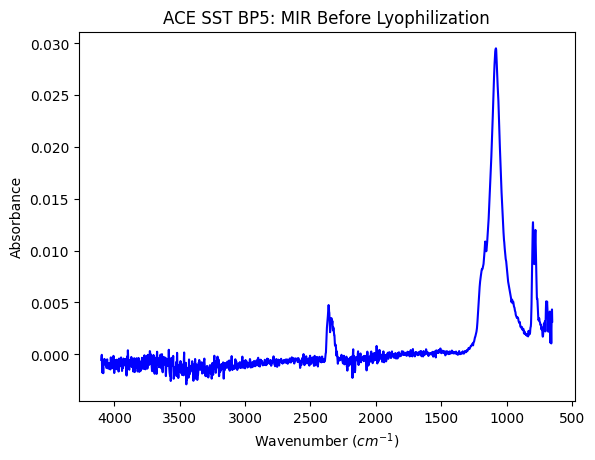

In [839]:
SELECTED_SUBSAMPLES['BEFORE_MIR']['ACE SST BP5'] = 4
plot_mir_before(sample='ACE SST BP5')

#### ACE SST BP6

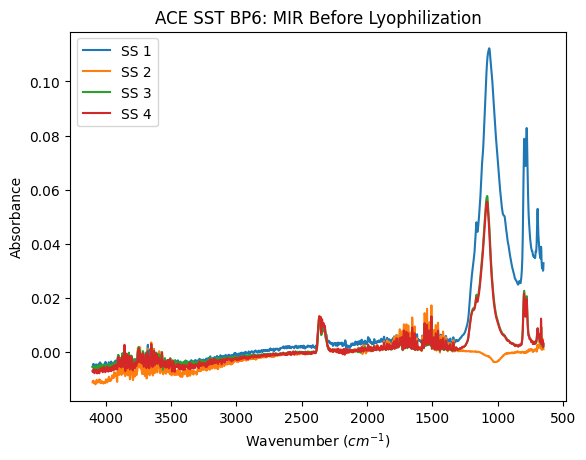

In [840]:
plot_mir_before(sample='ACE SST BP6', showAll=True)

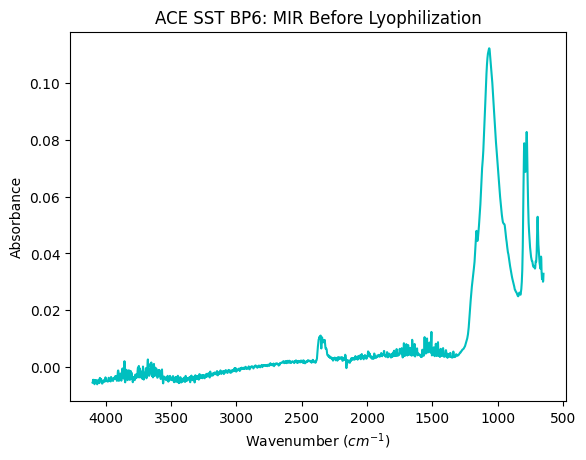

In [841]:
SELECTED_SUBSAMPLES['BEFORE_MIR']['ACE SST BP6'] = 1
plot_mir_before(sample='ACE SST BP6')

#### ACE SST BLACK

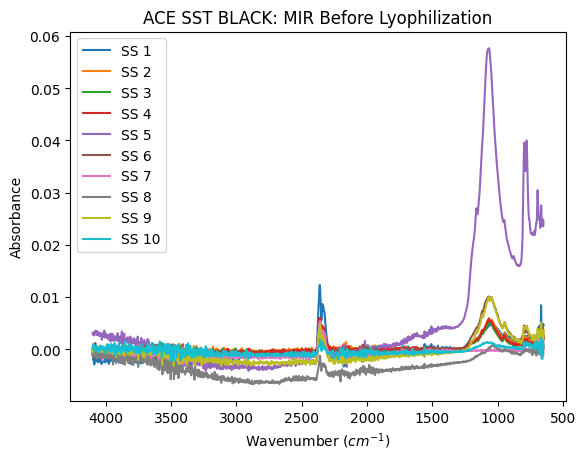

In [842]:
plot_mir_before(sample='ACE SST BLACK', showAll=True)

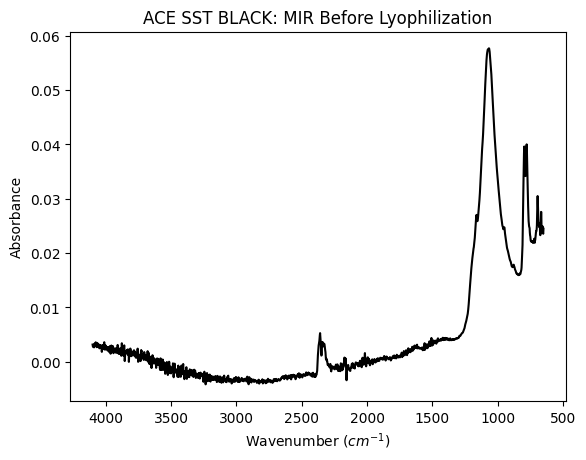

In [843]:
SELECTED_SUBSAMPLES['BEFORE_MIR']['ACE SST BLACK'] = 5
plot_mir_before(sample='ACE SST BLACK')

#### SCOTT MAT

In [844]:
plot_mir_before(sample='SCOTT MAT', showAll=True)

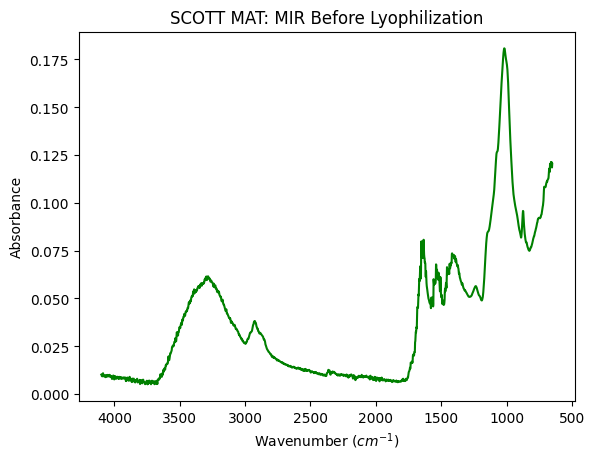

In [845]:
SELECTED_SUBSAMPLES['BEFORE_MIR']['SCOTT MAT'] = 4
plot_mir_before(sample='SCOTT MAT')

#### SOPHIA

In [846]:
plot_mir_before(sample='SOPHIA', showAll=True)

In [847]:
SELECTED_SUBSAMPLES['BEFORE_MIR']['SOPHIA'] = 3
plot_mir_before(sample='SOPHIA')

#### SOPHIA MAT

In [848]:
plot_mir_before(sample='SOPHIA MAT', showAll=True)

In [849]:
SELECTED_SUBSAMPLES['BEFORE_MIR']['SOPHIA MAT'] = 4
plot_mir_before(sample='SOPHIA MAT')

### After Lyophilization

In [850]:
def plot_mir_after(sample, showAll=False):
    plot_sample(sample=sample, isMIR=True, isBefore=False, showAll=showAll)

#### ACE SST BP5

In [851]:
plot_mir_after(sample='ACE SST BP5', showAll=True)

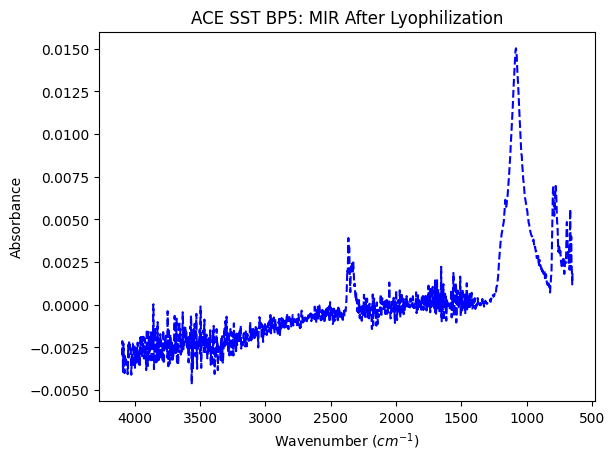

In [852]:
SELECTED_SUBSAMPLES['AFTER_MIR']['ACE SST BP5'] = 1
plot_mir_after(sample='ACE SST BP5')

#### ACE SST BP6

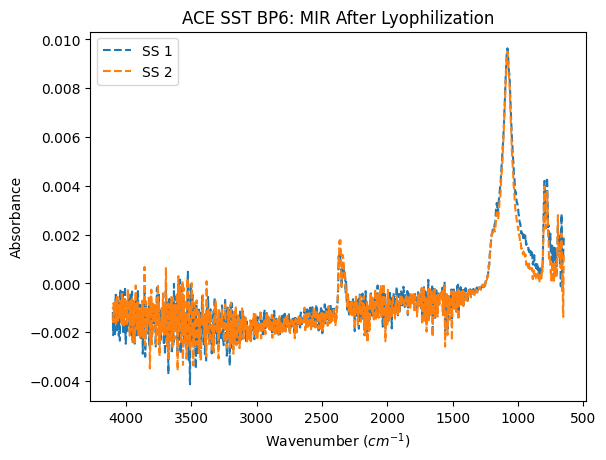

In [853]:
plot_mir_after(sample='ACE SST BP6', showAll=True)

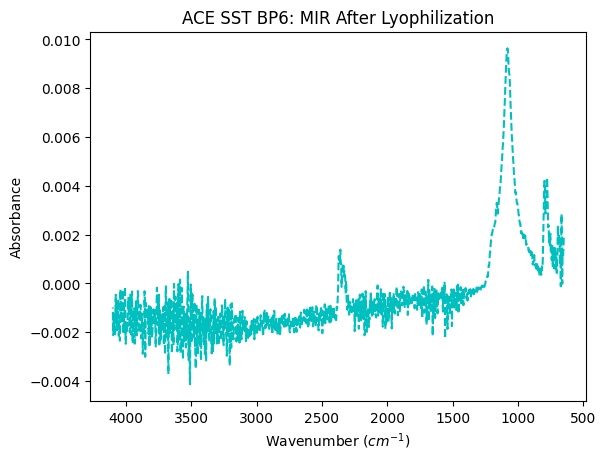

In [854]:
SELECTED_SUBSAMPLES['AFTER_MIR']['ACE SST BP6'] = 1
plot_mir_after(sample='ACE SST BP6')

#### ACE SST BLACK

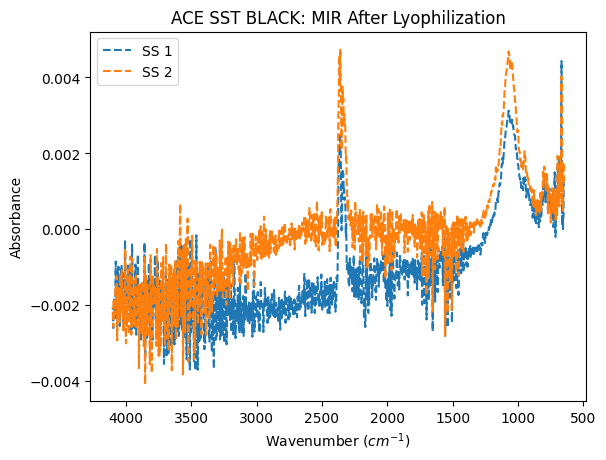

In [855]:
plot_mir_after(sample='ACE SST BLACK', showAll=True)

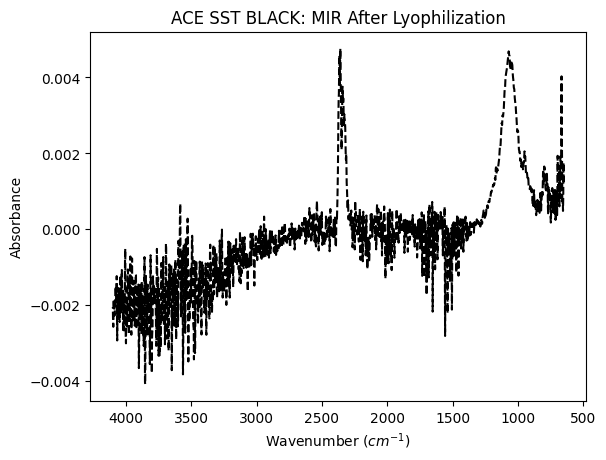

In [856]:
SELECTED_SUBSAMPLES['AFTER_MIR']['ACE SST BLACK'] = 2
plot_mir_after(sample='ACE SST BLACK')

#### SCOTT MAT

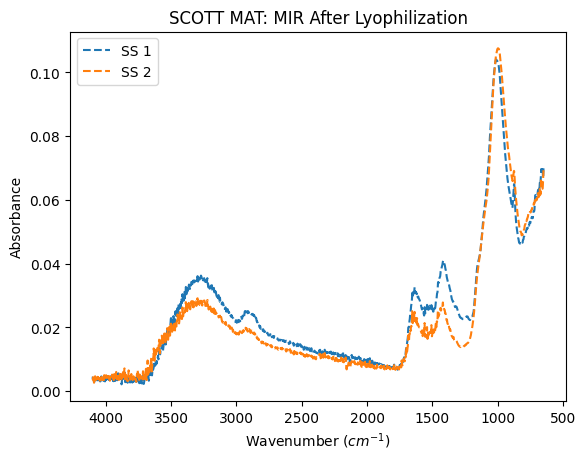

In [857]:
plot_mir_after(sample='SCOTT MAT', showAll=True)

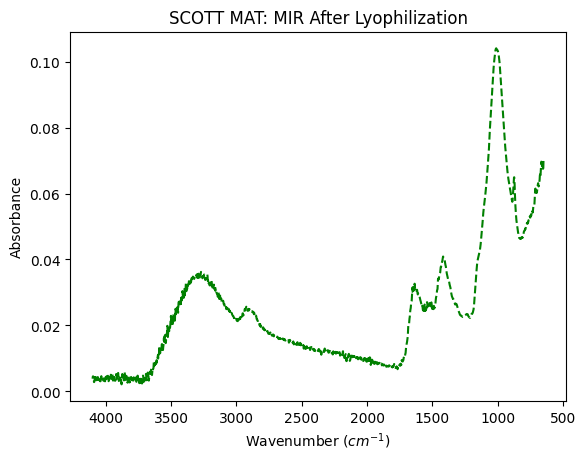

In [858]:
SELECTED_SUBSAMPLES['AFTER_MIR']['SCOTT MAT'] = 1
plot_mir_after(sample='SCOTT MAT')

#### SOPHIA

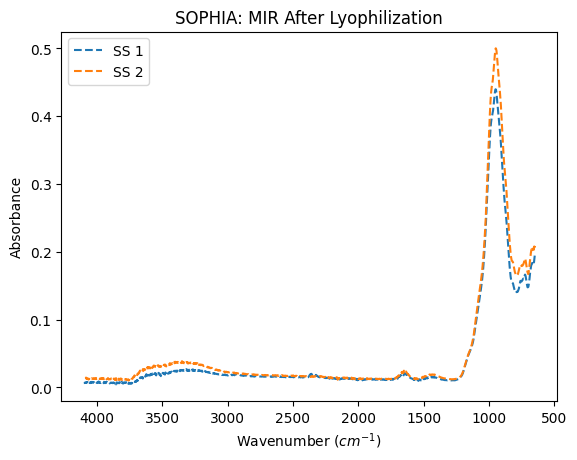

In [859]:
plot_mir_after(sample='SOPHIA', showAll=True)

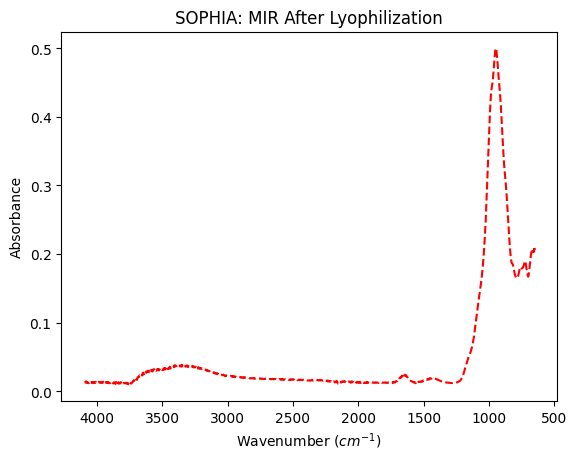

In [860]:
SELECTED_SUBSAMPLES['AFTER_MIR']['SOPHIA'] = 2
plot_mir_after(sample='SOPHIA')

#### SOPHIA MAT

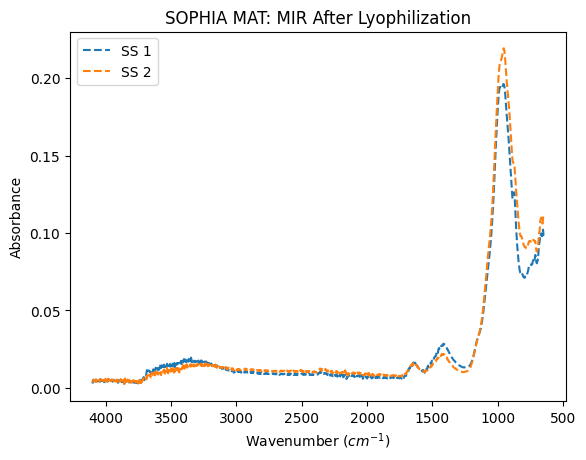

In [861]:
plot_mir_after(sample='SOPHIA MAT', showAll=True)

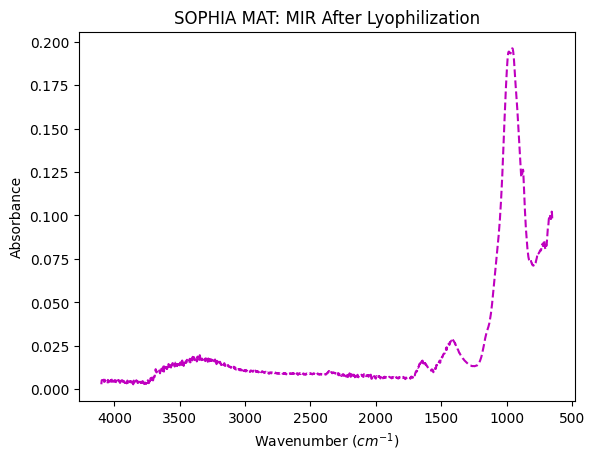

In [862]:
SELECTED_SUBSAMPLES['AFTER_MIR']['SOPHIA MAT'] = 1
plot_mir_after(sample='SOPHIA MAT')

### Lyophilization Effects

#### ACE SST BP5

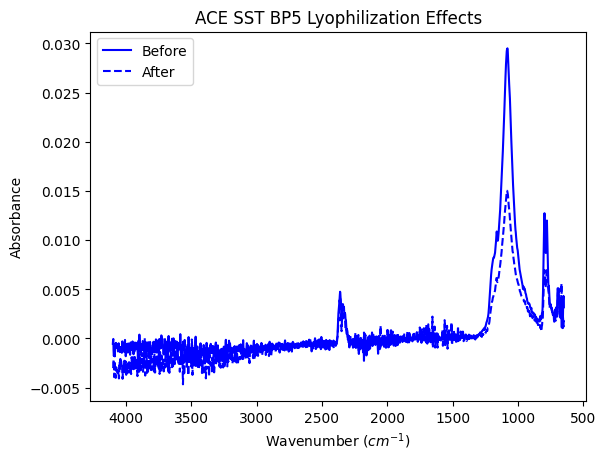

In [863]:
compare_subsamples(sample_A='ACE SST BP5', sample_A_isBefore=True, isMIR=True)

#### ACE SST BP6

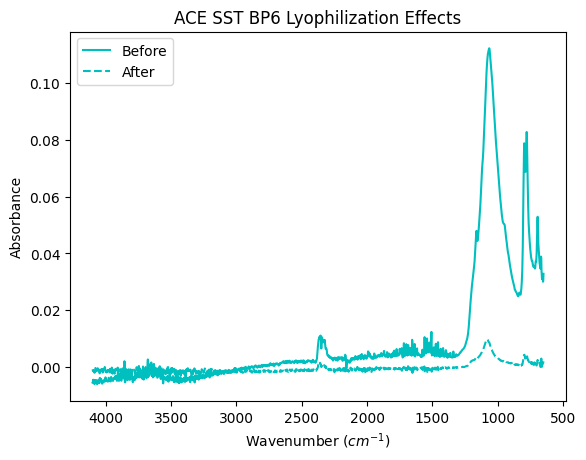

In [864]:
compare_subsamples(sample_A='ACE SST BP6', sample_A_isBefore=True, isMIR=True)

#### ACE SST BLACK

In [865]:
compare_subsamples(sample_A='ACE SST BLACK', sample_A_isBefore=True, isMIR=True)

#### SCOTT MAT

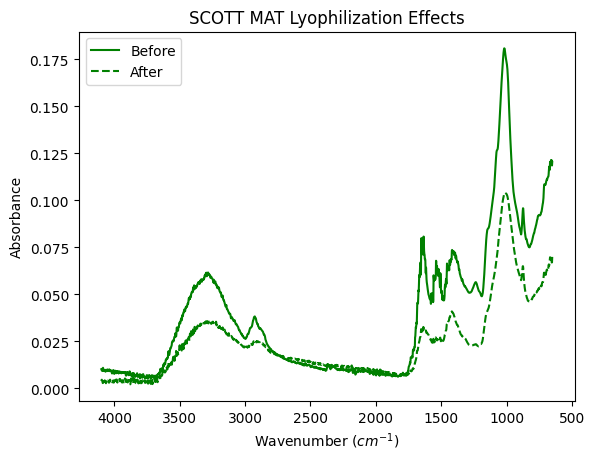

In [866]:
compare_subsamples(sample_A='SCOTT MAT', sample_A_isBefore=True, isMIR=True)

#### SOPHIA

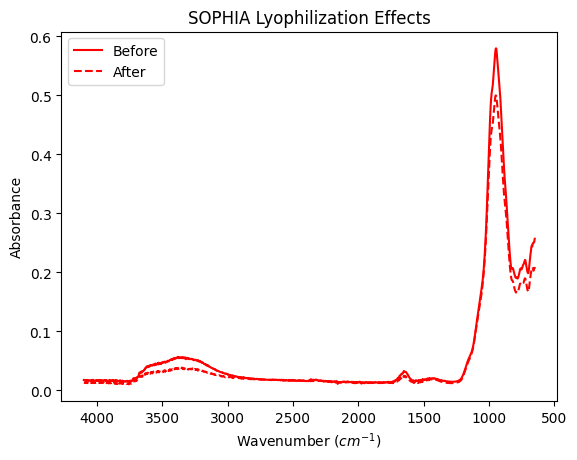

In [867]:
compare_subsamples(sample_A='SOPHIA', sample_A_isBefore=True, isMIR=True)

#### SOPHIA MAT

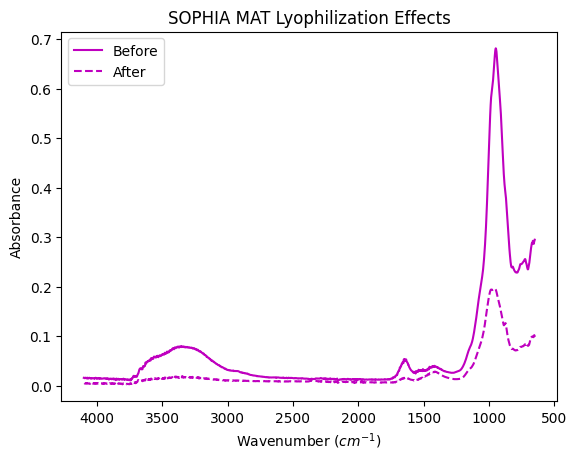

In [868]:
compare_subsamples(sample_A='SOPHIA MAT', sample_A_isBefore=True, isMIR=True)

### ACE SST Analysis

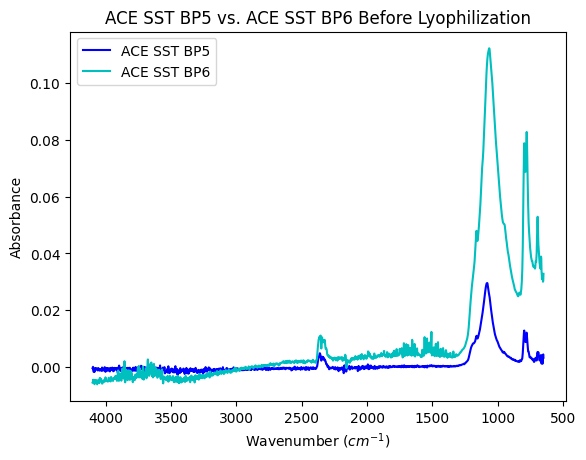

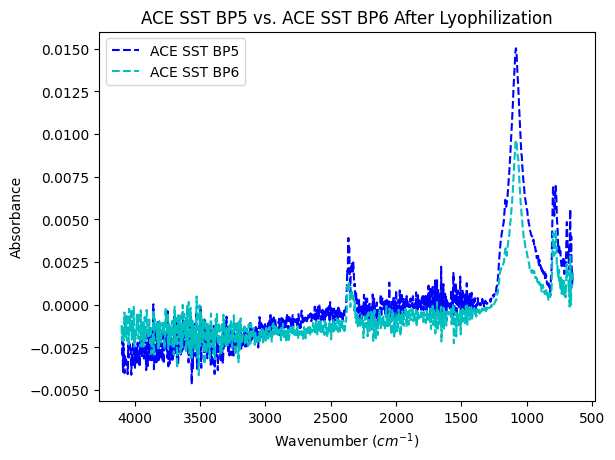

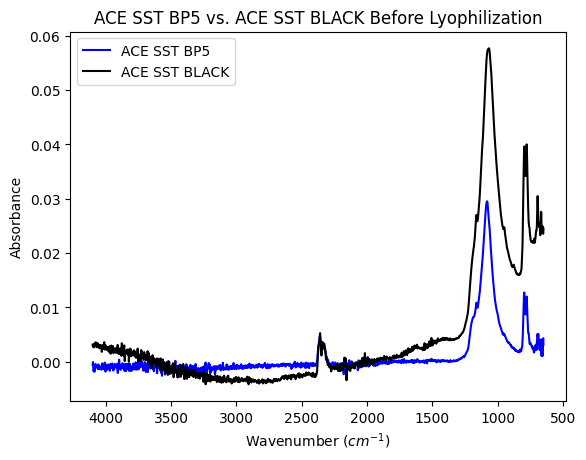

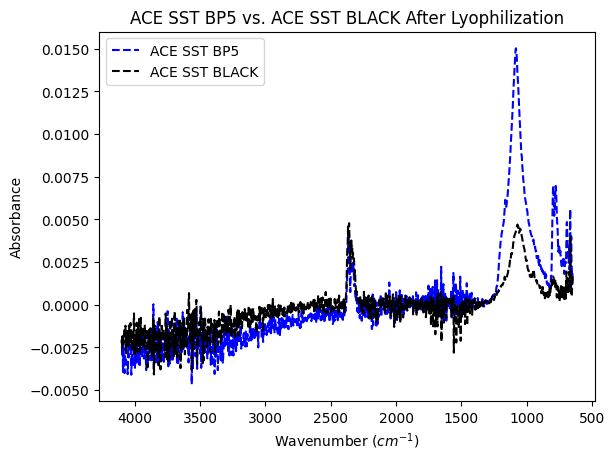

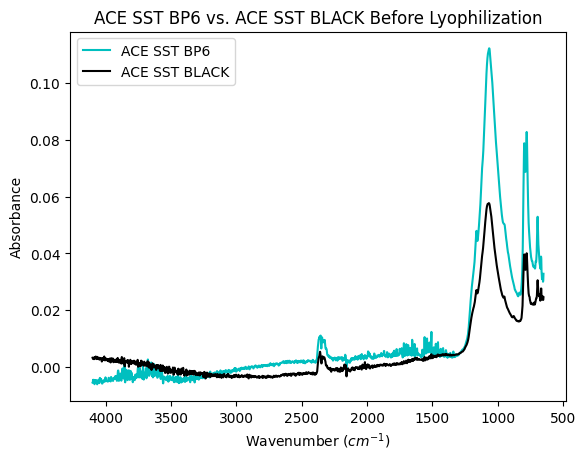

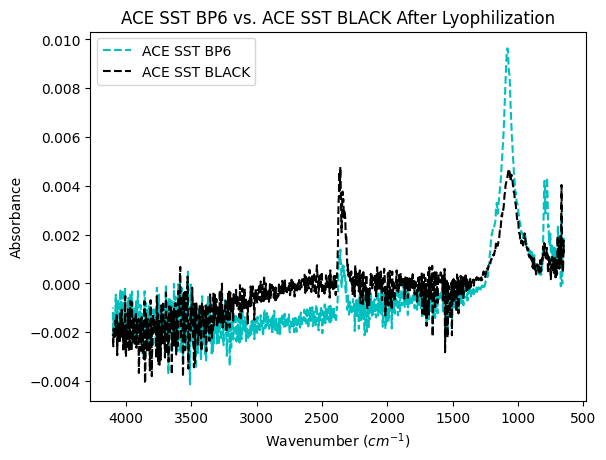

In [869]:
compare_subsamples(sample_A='ACE SST BP5', sample_B='ACE SST BP6', sample_A_isBefore=True, sample_B_isBefore=True, isMIR=True)
compare_subsamples(sample_A='ACE SST BP5', sample_B='ACE SST BP6', sample_A_isBefore=False, sample_B_isBefore=False, isMIR=True)
compare_subsamples(sample_A='ACE SST BP5', sample_B='ACE SST BLACK', sample_A_isBefore=True, sample_B_isBefore=True, isMIR=True)
compare_subsamples(sample_A='ACE SST BP5', sample_B='ACE SST BLACK', sample_A_isBefore=False, sample_B_isBefore=False, isMIR=True)
compare_subsamples(sample_A='ACE SST BP6', sample_B='ACE SST BLACK', sample_A_isBefore=True, sample_B_isBefore=True, isMIR=True)
compare_subsamples(sample_A='ACE SST BP6', sample_B='ACE SST BLACK', sample_A_isBefore=False, sample_B_isBefore=False, isMIR=True)

### SOPHIA Analysis

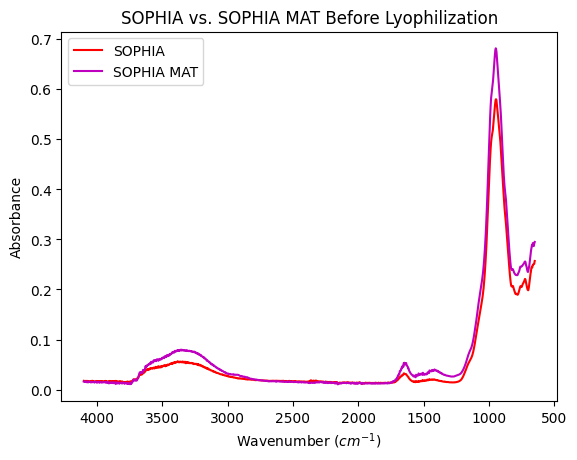

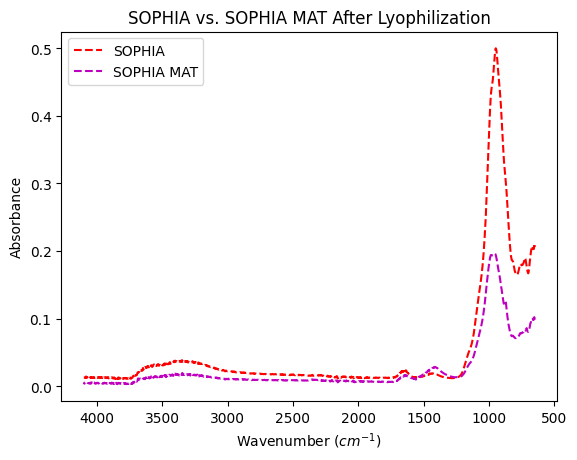

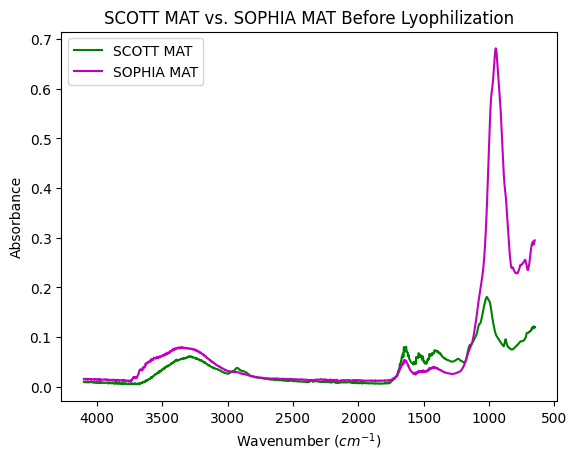

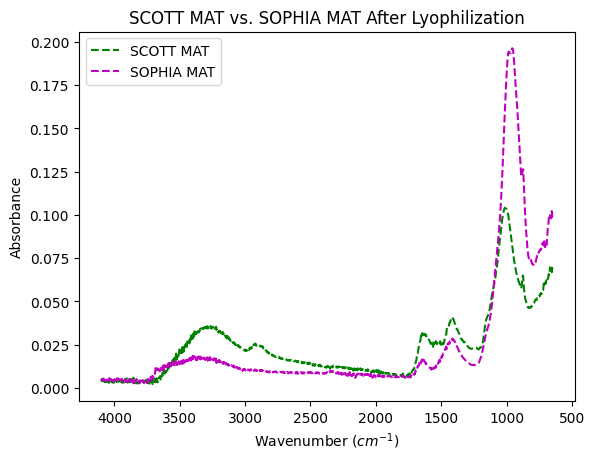

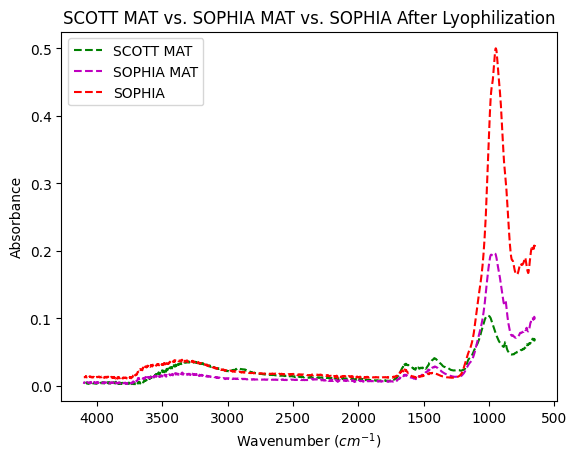

In [870]:
compare_subsamples(sample_A='SOPHIA', sample_B='SOPHIA MAT', sample_A_isBefore=True, sample_B_isBefore=True, isMIR=True)
compare_subsamples(sample_A='SOPHIA', sample_B='SOPHIA MAT', sample_A_isBefore=False, sample_B_isBefore=False, isMIR=True)
compare_subsamples(sample_A='SCOTT MAT', sample_B='SOPHIA MAT', sample_A_isBefore=True, sample_B_isBefore=True, isMIR=True)
compare_subsamples(sample_A='SCOTT MAT', sample_B='SOPHIA MAT', sample_A_isBefore=False, sample_B_isBefore=False, isMIR=True)
compare_subsamples(sample_A='SCOTT MAT', sample_B='SOPHIA MAT', sample_C='SOPHIA', sample_A_isBefore=True, sample_B_isBefore=True, sample_C_isBefore=True, isMIR=True)
compare_subsamples(sample_A='SCOTT MAT', sample_B='SOPHIA MAT', sample_C='SOPHIA', sample_A_isBefore=False, sample_B_isBefore=False, sample_C_isBefore=False, isMIR=True)

## VIS-NIR Analysis

### Before Lyophilization

In [871]:
def plot_vis_nir_before(sample, showAll=False):
    plot_sample(sample=sample, isMIR=False, isBefore=True, showAll=showAll)

#### ACE SST BP5

In [872]:
plot_vis_nir_before(sample='ACE SST BP5', showAll=True)

In [873]:
SELECTED_SUBSAMPLES['BEFORE_VIS_NIR']['ACE SST BP5'] = 3
plot_vis_nir_before(sample='ACE SST BP5')

#### ACE SST BP6

In [874]:
plot_vis_nir_before(sample='ACE SST BP6', showAll=True)

In [875]:
SELECTED_SUBSAMPLES['BEFORE_VIS_NIR']['ACE SST BP6'] = 2
plot_vis_nir_before(sample='ACE SST BP6')

#### ACE SST BLACK

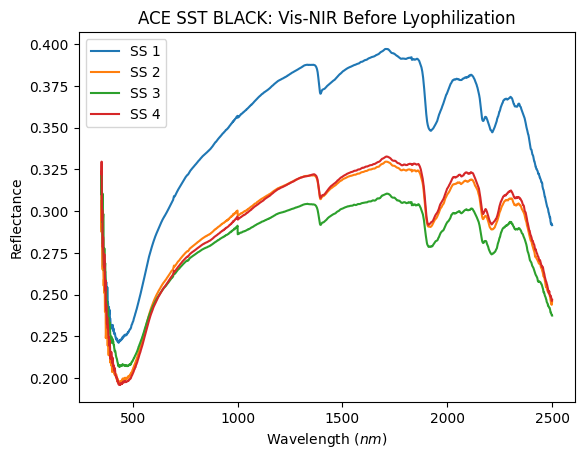

In [876]:
plot_vis_nir_before(sample='ACE SST BLACK', showAll=True)

In [877]:
SELECTED_SUBSAMPLES['BEFORE_VIS_NIR']['ACE SST BLACK'] = 4
plot_vis_nir_before(sample='ACE SST BLACK')

#### SCOTT MAT

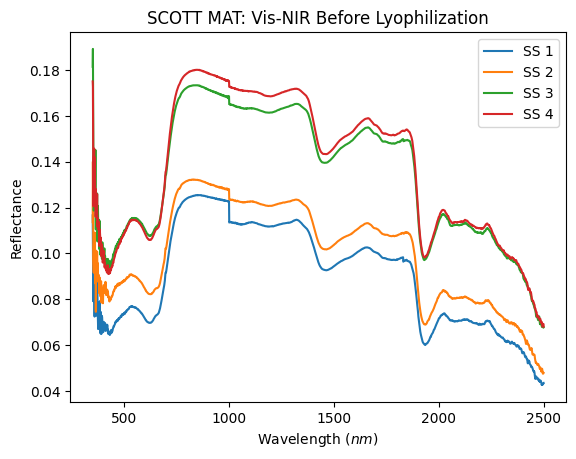

In [878]:
plot_vis_nir_before(sample='SCOTT MAT', showAll=True)

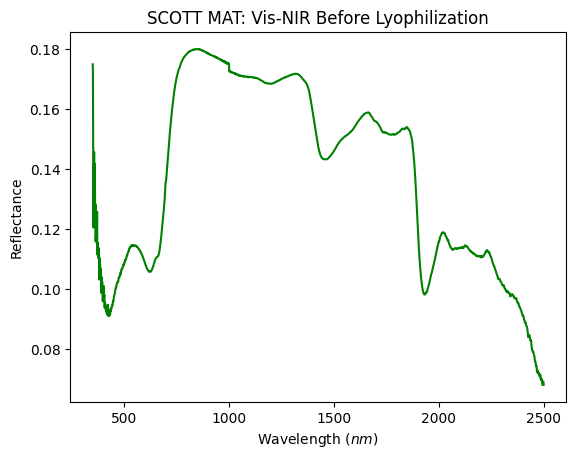

In [879]:
SELECTED_SUBSAMPLES['BEFORE_VIS_NIR']['SCOTT MAT'] = 4
plot_vis_nir_before(sample='SCOTT MAT')

#### SOPHIA

In [880]:
plot_vis_nir_before(sample='SOPHIA', showAll=True)

In [881]:
SELECTED_SUBSAMPLES['BEFORE_VIS_NIR']['SOPHIA'] = 1
plot_vis_nir_before(sample='SOPHIA')

#### SOPHIA MAT

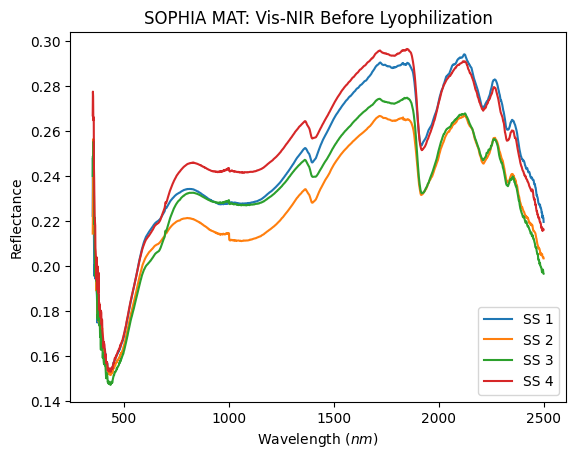

In [882]:
plot_vis_nir_before(sample='SOPHIA MAT', showAll=True)

In [883]:
SELECTED_SUBSAMPLES['BEFORE_VIS_NIR']['SOPHIA MAT'] = 3
plot_vis_nir_before(sample='SOPHIA MAT')

### After Lyophilization

In [884]:
def plot_vis_nir_after(sample, showAll=False):
    plot_sample(sample=sample, isMIR=False, isBefore=False, showAll=showAll)

#### ACE SST BP5

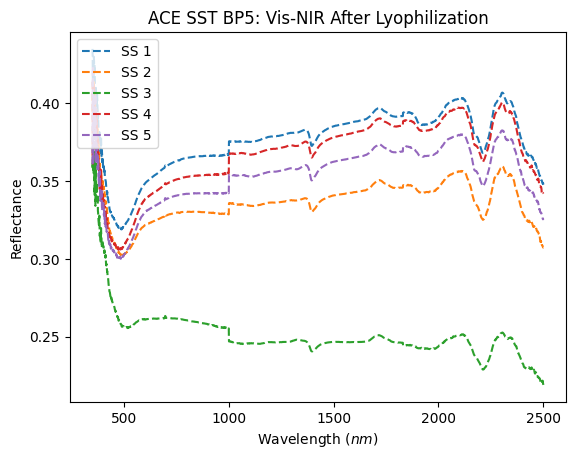

In [885]:
plot_vis_nir_after(sample='ACE SST BP5', showAll=True)

In [886]:
SELECTED_SUBSAMPLES['AFTER_VIS_NIR']['ACE SST BP5'] = 2
plot_vis_nir_after(sample='ACE SST BP5')

#### ACE SST BP6

In [887]:
plot_vis_nir_after(sample='ACE SST BP6', showAll=True)

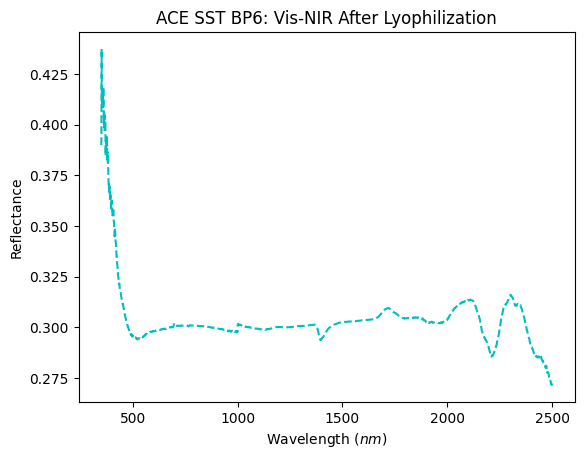

In [888]:
SELECTED_SUBSAMPLES['AFTER_VIS_NIR']['ACE SST BP6'] = 4
plot_vis_nir_after(sample='ACE SST BP6')

#### ACE SST BLACK

In [889]:
plot_vis_nir_after(sample='ACE SST BLACK', showAll=True)

In [890]:
SELECTED_SUBSAMPLES['AFTER_VIS_NIR']['ACE SST BLACK'] = 4
plot_vis_nir_after(sample='ACE SST BLACK')

#### SCOTT MAT

In [891]:
plot_vis_nir_after(sample='SCOTT MAT', showAll=True)

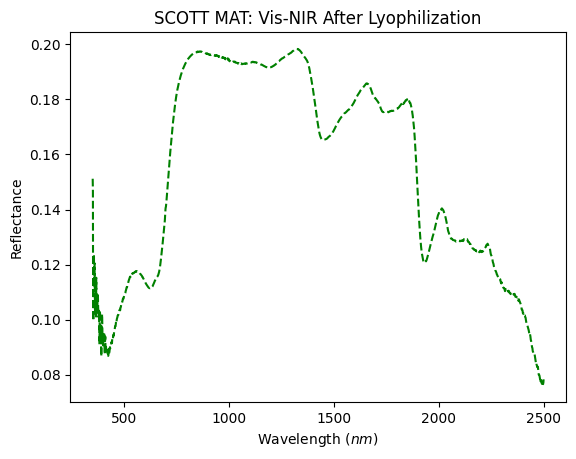

In [892]:
SELECTED_SUBSAMPLES['AFTER_VIS_NIR']['SCOTT MAT'] = 3
plot_vis_nir_after(sample='SCOTT MAT')

#### SOPHIA

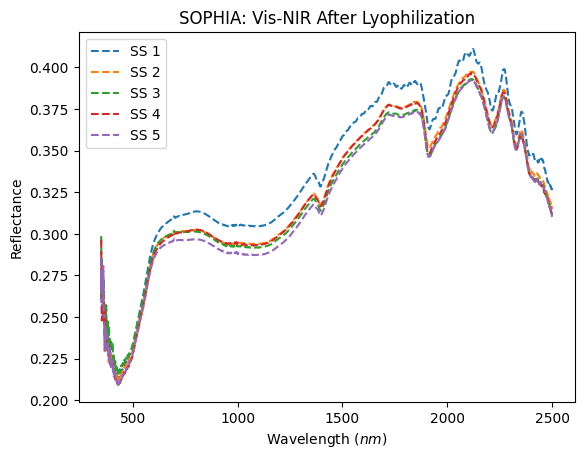

In [893]:
plot_vis_nir_after(sample='SOPHIA', showAll=True)

In [894]:
SELECTED_SUBSAMPLES['AFTER_VIS_NIR']['SOPHIA'] = 1
plot_vis_nir_after(sample='SOPHIA')

#### SOPHIA MAT

In [895]:
plot_vis_nir_after(sample='SOPHIA MAT', showAll=True)

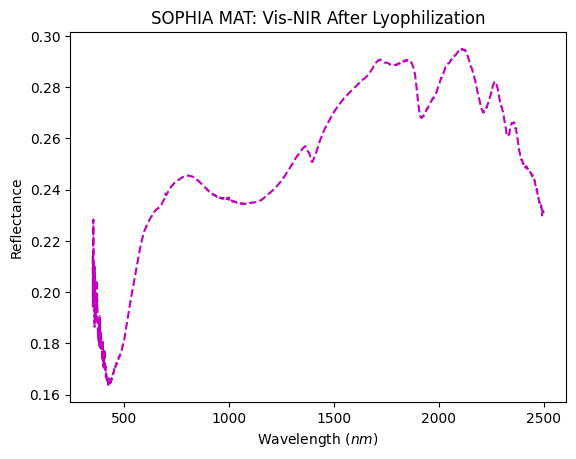

In [896]:
SELECTED_SUBSAMPLES['AFTER_VIS_NIR']['SOPHIA MAT'] = 1
plot_vis_nir_after(sample='SOPHIA MAT')

### Lyophilization Effects

#### ACE SST BP5

In [897]:
compare_subsamples(sample_A='ACE SST BP5', sample_A_isBefore=True, isMIR=False)

#### ACE SST BP6

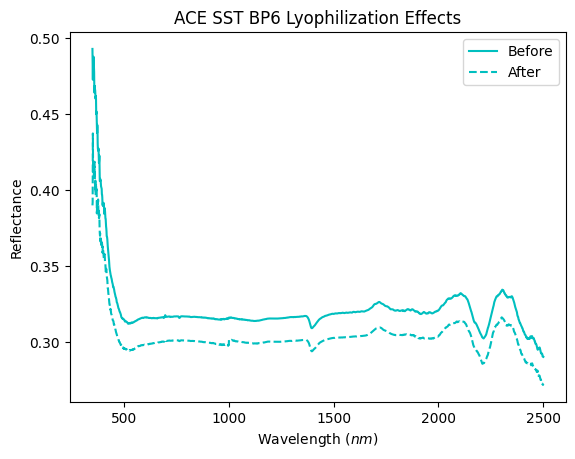

In [898]:
compare_subsamples(sample_A='ACE SST BP6', sample_A_isBefore=True, isMIR=False)

#### ACE SST BLACK

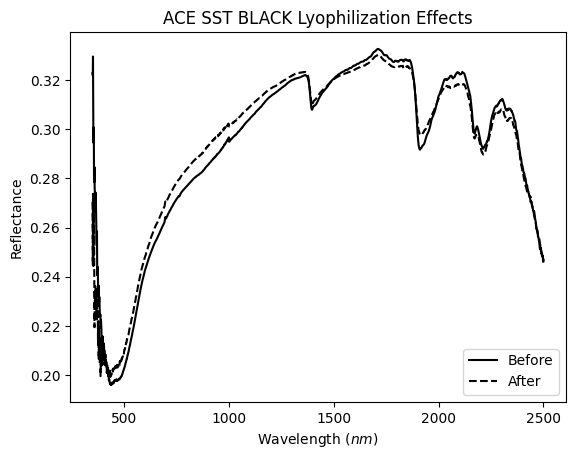

In [900]:
compare_subsamples(sample_A='ACE SST BLACK', sample_A_isBefore=True, isMIR=False)

#### SCOTT MAT

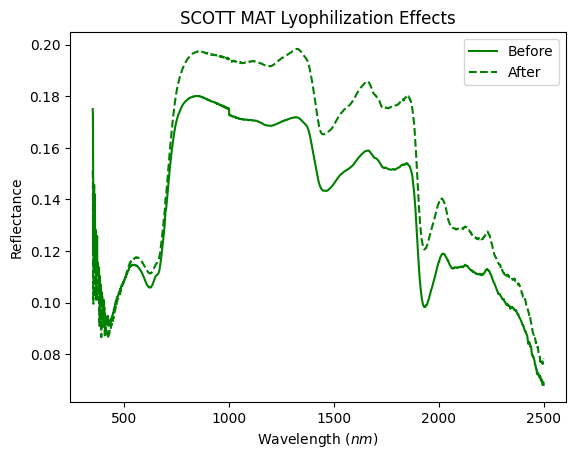

In [901]:
compare_subsamples(sample_A='SCOTT MAT', sample_A_isBefore=True, isMIR=False)

#### SOPHIA

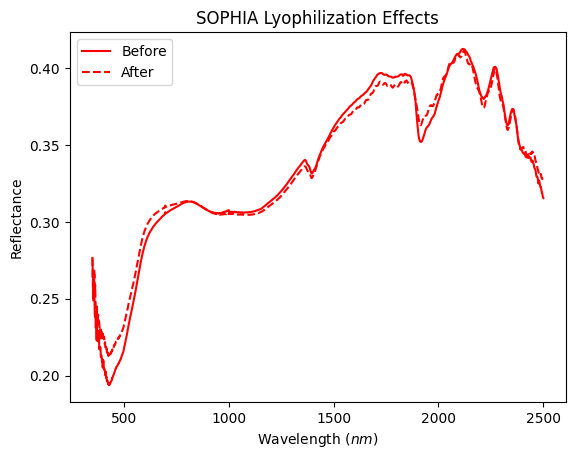

In [902]:
compare_subsamples(sample_A='SOPHIA', sample_A_isBefore=True, isMIR=False)

#### SOPHIA MAT

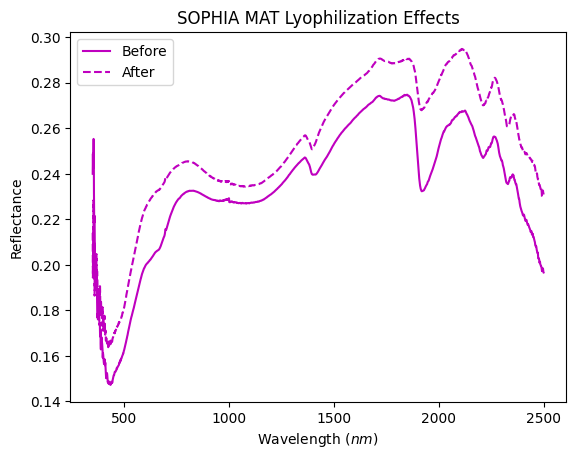

In [904]:
compare_subsamples(sample_A='SOPHIA MAT', sample_A_isBefore=True, isMIR=False)

### ACE SST Analysis

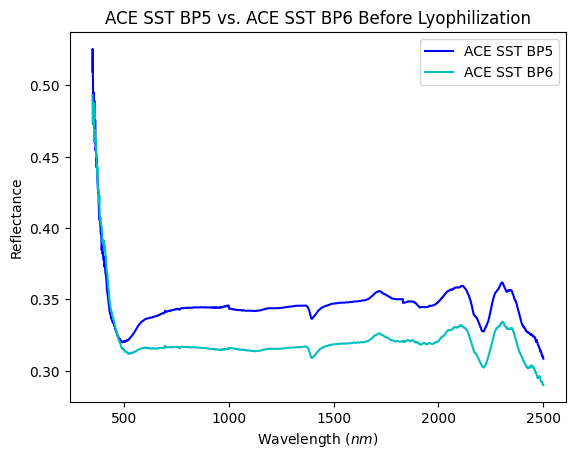

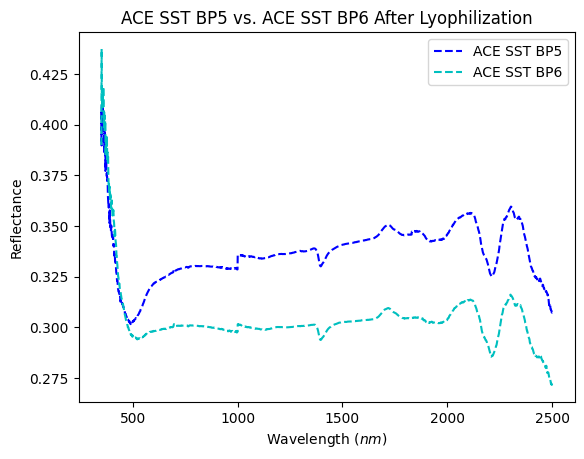

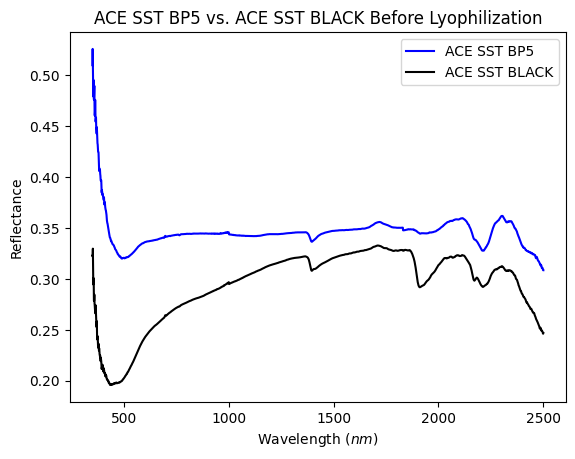

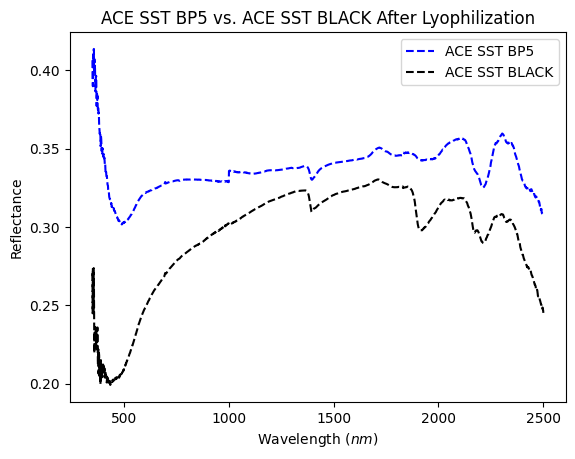

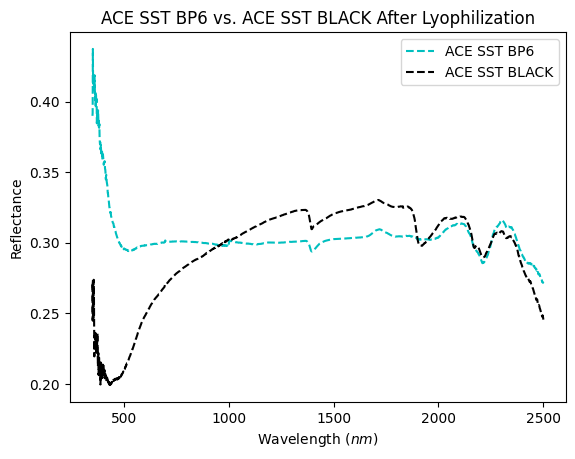

In [905]:
compare_subsamples(sample_A='ACE SST BP5', sample_B='ACE SST BP6', sample_A_isBefore=True, sample_B_isBefore=True, isMIR=False)
compare_subsamples(sample_A='ACE SST BP5', sample_B='ACE SST BP6', sample_A_isBefore=False, sample_B_isBefore=False, isMIR=False)
compare_subsamples(sample_A='ACE SST BP5', sample_B='ACE SST BLACK', sample_A_isBefore=True, sample_B_isBefore=True, isMIR=False)
compare_subsamples(sample_A='ACE SST BP5', sample_B='ACE SST BLACK', sample_A_isBefore=False, sample_B_isBefore=False, isMIR=False)
compare_subsamples(sample_A='ACE SST BP6', sample_B='ACE SST BLACK', sample_A_isBefore=True, sample_B_isBefore=True, isMIR=False)
compare_subsamples(sample_A='ACE SST BP6', sample_B='ACE SST BLACK', sample_A_isBefore=False, sample_B_isBefore=False, isMIR=False)

### SOPHIA Analysis

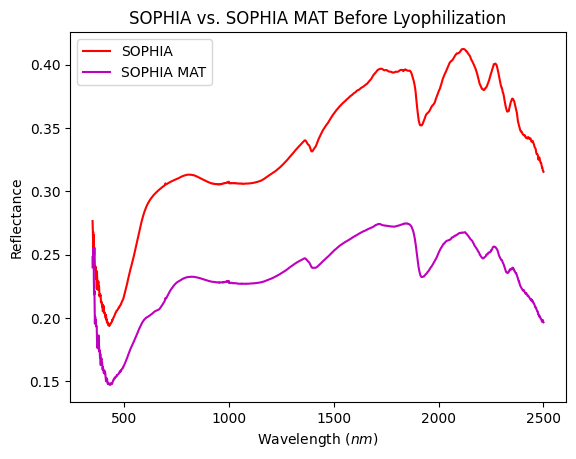

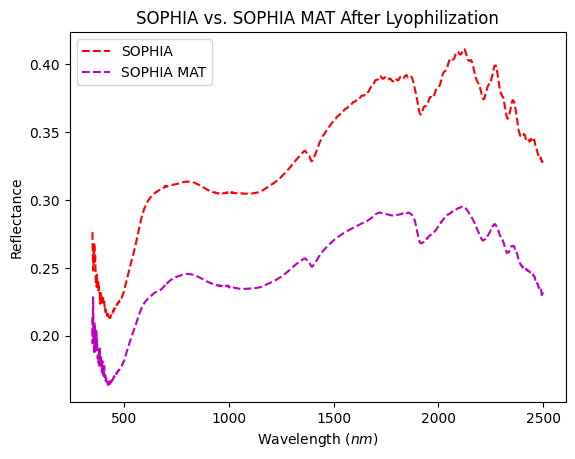

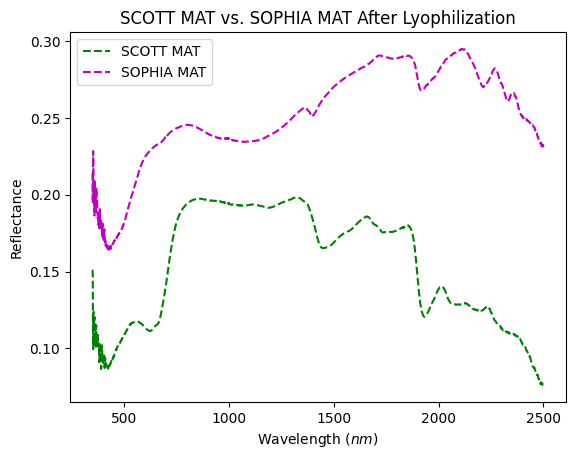

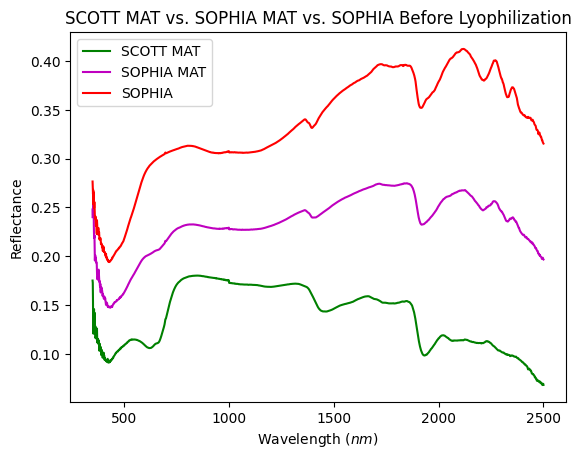

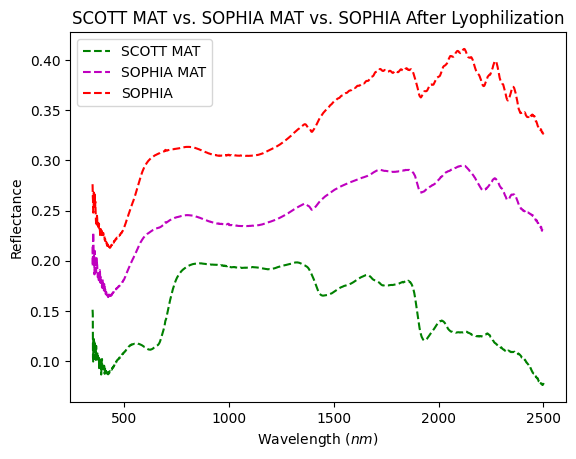

In [906]:
compare_subsamples(sample_A='SOPHIA', sample_B='SOPHIA MAT', sample_A_isBefore=True, sample_B_isBefore=True, isMIR=False)
compare_subsamples(sample_A='SOPHIA', sample_B='SOPHIA MAT', sample_A_isBefore=False, sample_B_isBefore=False, isMIR=False)
compare_subsamples(sample_A='SCOTT MAT', sample_B='SOPHIA MAT', sample_A_isBefore=True, sample_B_isBefore=True, isMIR=False)
compare_subsamples(sample_A='SCOTT MAT', sample_B='SOPHIA MAT', sample_A_isBefore=False, sample_B_isBefore=False, isMIR=False)
compare_subsamples(sample_A='SCOTT MAT', sample_B='SOPHIA MAT', sample_C='SOPHIA', sample_A_isBefore=True, sample_B_isBefore=True, sample_C_isBefore=True, isMIR=False)
compare_subsamples(sample_A='SCOTT MAT', sample_B='SOPHIA MAT', sample_C='SOPHIA', sample_A_isBefore=False, sample_B_isBefore=False, sample_C_isBefore=False, isMIR=False)